In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [3]:
df = pd.read_excel('/content/ValueSets (1).xlsx', sheet_name=1)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [5]:
df

,Name,Code System,Type,Steward,OID,Expansion Status,Expansion Date,Code Count
0,0 to IIIB Colorectal Cancer Staging,SNOMEDCT,Extensional,CancerLinQ,2.16.840.1.113762.1.4.1260.79,Active,2025-10-03,9
1,2 Hour Blood Glucose Test,LOINC,Extensional,AHA,2.16.840.1.113762.1.4.1178.25,Active,2025-05-08,4
2,20 to 42 Plus Weeks Gestation,ICD10CM SNOMEDCT,Grouping,The Joint Commission,2.16.840.1.113762.1.4.1110.67,Active,2025-10-03,51
3,20 to 42 Plus Weeks Gestation,ICD10CM,Extensional,The Joint Commission,2.16.840.1.113762.1.4.1110.70,Active,2025-07-30,24
4,20 to 42 Plus Weeks Gestation,SNOMEDCT,Extensional,The Joint Commission,2.16.840.1.113762.1.4.1110.71,Active,2025-10-03,27
...,...,...,...,...,...,...,...,...
17040,Zileuton Oral Preparations,RXNORM,Extensional,NHLBI Implementation Science and Health Care I...,2.16.840.1.113762.1.4.1196.468,Not Maintained,2025-09-16,3
17041,Zinc,RXNORM,Extensional,Clinical Architecture,2.16.840.1.113883.3.3616.200.110.102.2091,Deprecated,2023-11-20,65
17042,Ziprasidone,RXNORM,Extensional,NCQA,2.16.840.1.113883.3.464.1003.1141,Not Maintained,2025-09-16,5
17043,Zolmitriptan,RXNORM,Extensional,AAN,2.16.840.1.113762.1.4.1034.656,Active,2025-09-16,4


In [6]:
df_Rx = df[df['Code System'].str.contains('RXNORM') == True]
#df_L[df_L['Code System'] == 'LOINC']
df_Rx

,Name,Code System,Type,Steward,OID,Expansion Status,Expansion Date,Code Count
59,Abemaciclib,RXNORM,Extensional,CancerLinQ,2.16.840.1.113762.1.4.1260.476,Active,2025-09-16,24
87,Abortion Medications,RXNORM,Grouping,NACHC,2.16.840.1.113762.1.4.1221.179,Active,2025-09-16,123
141,Acamprosate,RXNORM,Extensional,NCQA,2.16.840.1.113883.3.464.1003.1154,Not Maintained,2025-09-16,1
153,ACE ARB Prescription,RXNORM,Extensional,Cliniwiz,2.16.840.1.113762.1.4.1200.245,Not Maintained,2025-09-16,284
155,ACE inhibitor allergy RXNORM,RXNORM,Extensional,Optum,2.16.840.1.113762.1.4.1078.45,Active,2025-09-16,279
...,...,...,...,...,...,...,...,...
17040,Zileuton Oral Preparations,RXNORM,Extensional,NHLBI Implementation Science and Health Care I...,2.16.840.1.113762.1.4.1196.468,Not Maintained,2025-09-16,3
17041,Zinc,RXNORM,Extensional,Clinical Architecture,2.16.840.1.113883.3.3616.200.110.102.2091,Deprecated,2023-11-20,65
17042,Ziprasidone,RXNORM,Extensional,NCQA,2.16.840.1.113883.3.464.1003.1141,Not Maintained,2025-09-16,5
17043,Zolmitriptan,RXNORM,Extensional,AAN,2.16.840.1.113762.1.4.1034.656,Active,2025-09-16,4


In [7]:
df['Type'].unique()

array(['Extensional', 'Grouping', 'Intensional'], dtype=object)

In [8]:
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, models

# 2) Build a Sentence-Transformers pipeline around Bio_ClinicalBERT
#    - 'Transformer' loads the HF model
#    - 'Pooling' does mean-pooling over token embeddings
biobert_name = "emilyalsentzer/Bio_ClinicalBERT"
word_model = models.Transformer(biobert_name, max_seq_length=256)
pooling    = models.Pooling(word_model.get_word_embedding_dimension(),
                            pooling_mode_mean_tokens=True)
model = SentenceTransformer(modules=[word_model, pooling])

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [9]:
texts = df_Rx["Name"].tolist()
embeddings = model.encode(texts, batch_size=2048, show_progress_bar=True, normalize_embeddings=True)
df_Rx['Vectors'] = list(embeddings)
df_Rx

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipython-input-4257420250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Rx['Vectors'] = list(embeddings)


,Name,Code System,Type,Steward,OID,Expansion Status,Expansion Date,Code Count,Vectors
59,Abemaciclib,RXNORM,Extensional,CancerLinQ,2.16.840.1.113762.1.4.1260.476,Active,2025-09-16,24,"[0.010189302, 0.018395107, -0.01246313, -0.009..."
87,Abortion Medications,RXNORM,Grouping,NACHC,2.16.840.1.113762.1.4.1221.179,Active,2025-09-16,123,"[0.014685398, -0.0050118407, -0.00525127, 0.01..."
141,Acamprosate,RXNORM,Extensional,NCQA,2.16.840.1.113883.3.464.1003.1154,Not Maintained,2025-09-16,1,"[-0.0019404216, -0.0070942035, 0.015153424, 0...."
153,ACE ARB Prescription,RXNORM,Extensional,Cliniwiz,2.16.840.1.113762.1.4.1200.245,Not Maintained,2025-09-16,284,"[0.025697509, 0.014055958, 0.005780882, 0.0209..."
155,ACE inhibitor allergy RXNORM,RXNORM,Extensional,Optum,2.16.840.1.113762.1.4.1078.45,Active,2025-09-16,279,"[0.037080724, 0.034618467, -0.0028592953, -0.0..."
...,...,...,...,...,...,...,...,...,...
17040,Zileuton Oral Preparations,RXNORM,Extensional,NHLBI Implementation Science and Health Care I...,2.16.840.1.113762.1.4.1196.468,Not Maintained,2025-09-16,3,"[0.014804781, -0.008553977, 0.01758541, 0.0099..."
17041,Zinc,RXNORM,Extensional,Clinical Architecture,2.16.840.1.113883.3.3616.200.110.102.2091,Deprecated,2023-11-20,65,"[0.015751095, 0.009203361, -0.016342498, -0.00..."
17042,Ziprasidone,RXNORM,Extensional,NCQA,2.16.840.1.113883.3.464.1003.1141,Not Maintained,2025-09-16,5,"[0.014015482, -0.0031677454, 0.024610838, 0.00..."
17043,Zolmitriptan,RXNORM,Extensional,AAN,2.16.840.1.113762.1.4.1034.656,Active,2025-09-16,4,"[0.013402489, 0.00714597, 0.0023990213, 0.0124..."


In [10]:
from sklearn.manifold import TSNE
import numpy as np

data_embed = TSNE(n_components=2,perplexity=50,verbose=2,method='barnes_hut').fit_transform(np.vstack(df_Rx['Vectors'].values))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2158 samples in 0.001s...
[t-SNE] Computed neighbors for 2158 samples in 0.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2158
[t-SNE] Computed conditional probabilities for sample 2000 / 2158
[t-SNE] Computed conditional probabilities for sample 2158 / 2158
[t-SNE] Mean sigma: 0.169720
[t-SNE] Computed conditional probabilities in 0.246s
[t-SNE] Iteration 50: error = 72.6846008, gradient norm = 0.0001134 (50 iterations in 3.312s)
[t-SNE] Iteration 100: error = 72.6110535, gradient norm = 0.0034722 (50 iterations in 2.105s)
[t-SNE] Iteration 150: error = 72.0982666, gradient norm = 0.0001240 (50 iterations in 2.113s)
[t-SNE] Iteration 200: error = 72.0906830, gradient norm = 0.0000180 (50 iterations in 1.523s)
[t-SNE] Iteration 250: error = 72.0906754, gradient norm = 0.0000182 (50 iterations in 1.796s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.090675
[t-SNE] Iteration 300: err

In [11]:
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.metrics import silhouette_score
df_Rx['X'] = data_embed[:, 0]
df_Rx['Y'] = data_embed[:, 1]

scores = [] #create a list of silhouette scores

for i in range(2,50):
  kmeans = KMeans(n_clusters=i, random_state=42, n_init = 10) # do kmeans for each k in range
  kmeans.fit(data_embed)
  scores.append(silhouette_score(data_embed, kmeans.labels_)) # add scores
idx = scores.index(max(scores)) # get index of highest score
print(idx + 2) #return index of highest score

'''
leave 25 for now until you learn advanced clsutering
'''

kmeans = KMeans(25, random_state=42, n_init = 'auto')
kmeans.fit(data_embed)
scores

/tmp/ipython-input-781587632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Rx['X'] = data_embed[:, 0]
/tmp/ipython-input-781587632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Rx['Y'] = data_embed[:, 1]


2


[np.float32(0.46619156),
 np.float32(0.36686218),
 np.float32(0.392095),
 np.float32(0.39909545),
 np.float32(0.39886233),
 np.float32(0.3731572),
 np.float32(0.3748126),
 np.float32(0.39089602),
 np.float32(0.392178),
 np.float32(0.39314258),
 np.float32(0.38339168),
 np.float32(0.3818864),
 np.float32(0.37784475),
 np.float32(0.38452497),
 np.float32(0.39138496),
 np.float32(0.39320692),
 np.float32(0.39241675),
 np.float32(0.387275),
 np.float32(0.38813126),
 np.float32(0.3865263),
 np.float32(0.38297653),
 np.float32(0.38906354),
 np.float32(0.38279778),
 np.float32(0.3848284),
 np.float32(0.37708673),
 np.float32(0.38050854),
 np.float32(0.38008752),
 np.float32(0.37843478),
 np.float32(0.38319963),
 np.float32(0.3803569),
 np.float32(0.37545308),
 np.float32(0.37981528),
 np.float32(0.38327754),
 np.float32(0.37669134),
 np.float32(0.37540114),
 np.float32(0.3828017),
 np.float32(0.38237053),
 np.float32(0.37984633),
 np.float32(0.37433374),
 np.float32(0.37902442),
 np.float32(0

In [12]:
graph_df = df_Rx.loc[:, ['Name', 'Type', 'OID', 'Code Count', 'X', 'Y']]
graph_df = graph_df.rename(columns={'X': 'x', 'Y': 'y'})
graph_df['Cluster'] = kmeans.labels_
graph_df

,Name,Type,OID,Code Count,x,y,Cluster
59,Abemaciclib,Extensional,2.16.840.1.113762.1.4.1260.476,24,-22.213741,6.543452,6
87,Abortion Medications,Grouping,2.16.840.1.113762.1.4.1221.179,123,37.058483,-37.724247,14
141,Acamprosate,Extensional,2.16.840.1.113883.3.464.1003.1154,1,-15.977266,-10.709178,22
153,ACE ARB Prescription,Extensional,2.16.840.1.113762.1.4.1200.245,284,10.083966,2.103325,19
155,ACE inhibitor allergy RXNORM,Extensional,2.16.840.1.113762.1.4.1078.45,279,46.000568,2.067122,11
...,...,...,...,...,...,...,...
17040,Zileuton Oral Preparations,Extensional,2.16.840.1.113762.1.4.1196.468,3,-8.963936,-15.137568,22
17041,Zinc,Extensional,2.16.840.1.113883.3.3616.200.110.102.2091,65,-1.617264,-10.458506,3
17042,Ziprasidone,Extensional,2.16.840.1.113883.3.464.1003.1141,5,-33.337963,-13.420173,4
17043,Zolmitriptan,Extensional,2.16.840.1.113762.1.4.1034.656,4,-28.480452,-8.656851,15


Text(0.5, 1.0, 't-SNE visualization of word vectors')

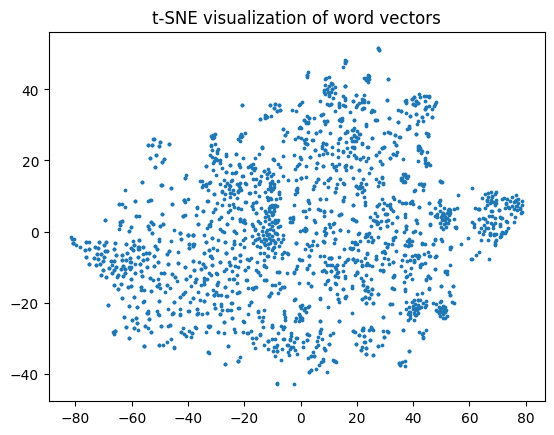

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df_Rx['X'], df_Rx['Y'], s=3)
plt.title("t-SNE visualization of word vectors")

In [17]:
import os
os.makedirs('d3-scatterplot', exist_ok=True)
graph_df.to_csv('d3-scatterplot/mytext_new.tsv', sep='\t', index=False)

In [18]:
# To make the visualizations
!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.


In [19]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'mytext_new.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port)
show_port(port, data_file, height)

<IPython.core.display.Javascript object>